# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

## Alunos

RM 340544 - Mauricio Raghe Binda <br>
RM 341704 - Ricardo da Silva Cruz <br>
RM 340347 - Rodrigo de Miranda Videira  <br>

___

## Exercício 3

## Imports

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf

In [97]:
df_spotify = pd.read_csv('datasets/DadosSpotify.csv', sep=',')

In [98]:
df_spotify.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [99]:
df_spotify.drop(columns=['id', 'song_title', 'artist'], axis=1, inplace=True)

In [1]:
# Coluna artist, usando metodo to_categorical, PD.getDumies

In [100]:
df_spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [101]:
df_spotify.shape

(2017, 14)

In [102]:
df_spotify.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
dtype: object

In [103]:
Y = df_spotify[['target']] #Target
X = df_spotify.drop(['target'], axis=1) #Features

In [104]:
Y.value_counts()

target
1         1020
0          997
dtype: int64

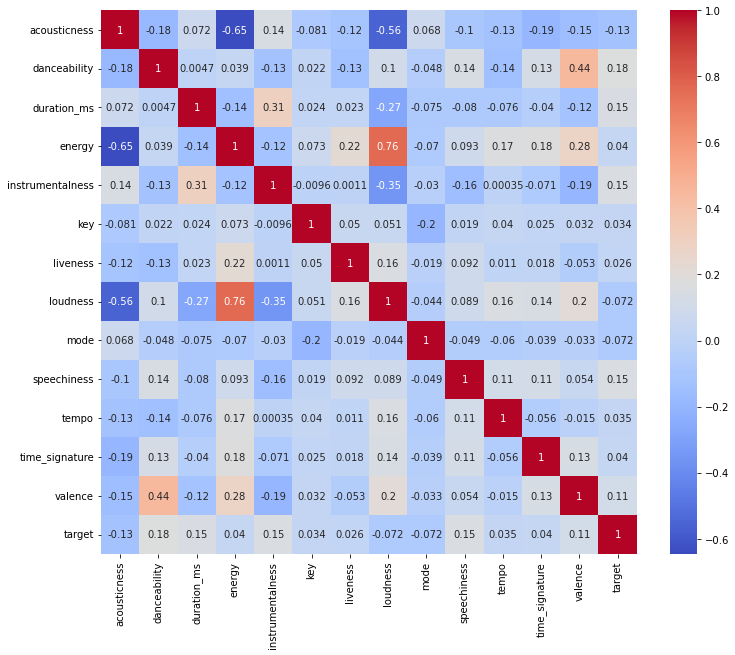

In [105]:
plt.subplots(figsize=(12, 10))
sns.heatmap(df_spotify.corr(), annot=True, cmap="coolwarm");

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [107]:
# Normalizando os dados das features

In [108]:
std_scaler = preprocessing.StandardScaler()
X_train_norm = std_scaler.fit_transform(X_train)

In [109]:
X_test_norm = std_scaler.transform(X_test)

In [110]:
num_features = len(X.columns)

In [111]:
num_classes = 1

In [112]:
# Criando o modelo

In [2]:
# Diminuir a rede para pelo menos dois, calibrando pesos.
# Equação Martin Han..

In [113]:
spotify_classificacao = tf.keras.Sequential();
spotify_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=10, kernel_initializer='uniform'))
spotify_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=10))
spotify_classificacao.add(tf.keras.layers.Dropout(0.1))
spotify_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=10))
spotify_classificacao.add(tf.keras.layers.Dropout(0.2))
spotify_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=10))


spotify_classificacao.add(tf.keras.layers.Dense(activation='sigmoid', units=num_classes))
spotify_classificacao.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelos/spotify.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
hist = spotify_classificacao.fit(X_train_norm, y_train, epochs=100, batch_size=6, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6757 - accuracy: 0.6020
Epoch 1: val_accuracy improved from -inf to 0.63251, saving model to modelos\spotify.hdf5
188/188 [==============================] - 2s 4ms/step - loss: 0.6757 - accuracy: 0.6020 - val_loss: 0.6502 - val_accuracy: 0.6325
Epoch 2/100
169/188 [=========================>....] - ETA: 0s - loss: 0.6092 - accuracy: 0.6795
Epoch 2: val_accuracy improved from 0.63251 to 0.65018, saving model to modelos\spotify.hdf5
188/188 [==============================] - 1s 3ms/step - loss: 0.6098 - accuracy: 0.6729 - val_loss: 0.6431 - val_accuracy: 0.6502
Epoch 3/100
174/188 [==========================>...] - ETA: 0s - loss: 0.5894 - accuracy: 0.6983
Epoch 3: val_accuracy improved from 0.65018 to 0.65724, saving model to modelos\spotify.hdf5
188/188 [==============================] - 1s 3ms/step - loss: 0.5932 - accuracy: 0.6968 - val_loss: 0.6283 - val_accuracy: 0.6572
Epoch 4/100
179/188 [===================

Epoch 29/100
170/188 [==========================>...] - ETA: 0s - loss: 0.4953 - accuracy: 0.7716
Epoch 29: val_accuracy improved from 0.70671 to 0.71025, saving model to modelos\spotify.hdf5
188/188 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.7704 - val_loss: 0.5866 - val_accuracy: 0.7102
Epoch 30/100
188/188 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.7793
Epoch 30: val_accuracy did not improve from 0.71025
188/188 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.7793 - val_loss: 0.5960 - val_accuracy: 0.7102
Epoch 31/100
162/188 [========================>.....] - ETA: 0s - loss: 0.4991 - accuracy: 0.7747
Epoch 31: val_accuracy improved from 0.71025 to 0.71731, saving model to modelos\spotify.hdf5
188/188 [==============================] - 1s 3ms/step - loss: 0.5008 - accuracy: 0.7757 - val_loss: 0.5988 - val_accuracy: 0.7173
Epoch 32/100
172/188 [==========================>...] - ETA: 0s - loss: 0

Epoch 58/100
184/188 [============================>.] - ETA: 0s - loss: 0.4531 - accuracy: 0.8053
Epoch 58: val_accuracy did not improve from 0.72085
188/188 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.8041 - val_loss: 0.6430 - val_accuracy: 0.6890
Epoch 59/100
185/188 [============================>.] - ETA: 0s - loss: 0.4583 - accuracy: 0.7982
Epoch 59: val_accuracy did not improve from 0.72085
188/188 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.7988 - val_loss: 0.6241 - val_accuracy: 0.7032
Epoch 60/100
175/188 [==========================>...] - ETA: 0s - loss: 0.4515 - accuracy: 0.7952
Epoch 60: val_accuracy did not improve from 0.72085
188/188 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.7943 - val_loss: 0.6310 - val_accuracy: 0.6890
Epoch 61/100
168/188 [=========================>....] - ETA: 0s - loss: 0.4475 - accuracy: 0.8125
Epoch 61: val_accuracy did not improve from 0.72085
188/188

In [114]:
spotify_classificacao_best = tf.keras.models.load_model('modelos/spotify.hdf5')

In [115]:
test_results = spotify_classificacao_best.evaluate(X_test_norm, y_test, verbose=1)
print(f'Resultado dos testes - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

19/19 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7063
Resultado dos testes - Loss: 0.5730419754981995 - Accuracy: 0.7062706351280212%


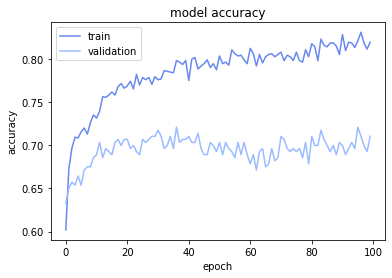

In [116]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [117]:
spotify_classificacao_best.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                140       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                